# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 576


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:

# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=imperial&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json['coord']['lat']
        city_lng = city_weather_json['coord']['lon']  # Corrected from 'lng' to 'lon'
        city_max_temp = city_weather_json['main']['temp_max']
        city_humidity = city_weather_json['main']['humidity']
        city_clouds = city_weather_json['clouds']['all']
        city_wind = city_weather_json['wind']['speed']
        city_country = city_weather_json['sys']['country']
        city_date = city_weather_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aasiaat
Processing Record 2 of Set 1 | agdas
Processing Record 3 of Set 1 | kapa'a
Processing Record 4 of Set 1 | kingscliff
Processing Record 5 of Set 1 | iskateley
Processing Record 6 of Set 1 | kawthoung
City not found. Skipping...
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | taiohae
City not found. Skipping...
Processing Record 9 of Set 1 | olonkinbyen
Processing Record 10 of Set 1 | tual
Processing Record 11 of Set 1 | whitehorse
Processing Record 12 of Set 1 | toma
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | isafjordur
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | antofagasta
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | kargaso

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aasiaat,68.7098,-52.8699,37.87,90,100,9.78,GL,1724890740
1,agdas,40.6500,47.4761,73.87,46,0,2.33,AZ,1724890783
2,kapa'a,22.0752,-159.3190,82.72,70,75,9.22,US,1724890739
3,kingscliff,-28.2667,153.5667,81.95,69,0,13.80,AU,1724890783
4,iskateley,67.6803,53.1512,45.36,91,77,12.95,RU,1724890784


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,37.87,90,100,9.78,GL,1724890740
1,agdas,40.6500,47.4761,73.87,46,0,2.33,AZ,1724890783
2,kapa'a,22.0752,-159.3190,82.72,70,75,9.22,US,1724890739
3,kingscliff,-28.2667,153.5667,81.95,69,0,13.80,AU,1724890783
4,iskateley,67.6803,53.1512,45.36,91,77,12.95,RU,1724890784


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

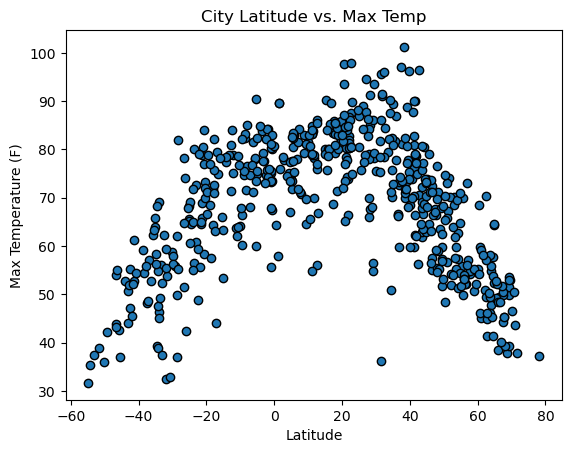

In [14]:
# Build scatter plot for latitude vs. temperature
x_vals = city_data_df['Lat']
y_vals = city_data_df['Max Temp']
plt.scatter(x_vals,y_vals,edgecolors="black")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temp')
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

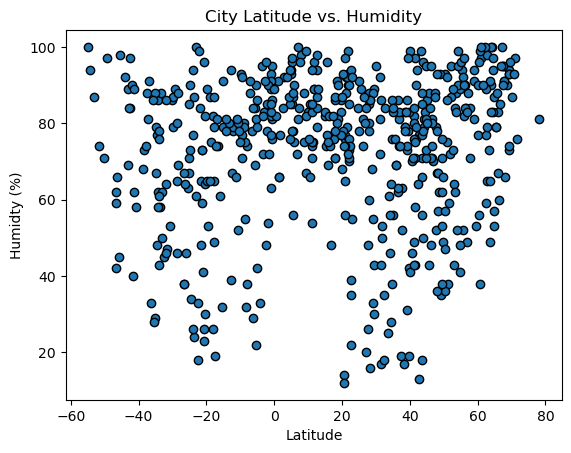

In [15]:
# Build the scatter plots for latitude vs. humidity
x_vals = city_data_df['Lat']
y_vals = city_data_df['Humidity']
plt.scatter(x_vals,y_vals,edgecolors="black")
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidty (%)')
plt.title('City Latitude vs. Humidity')
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

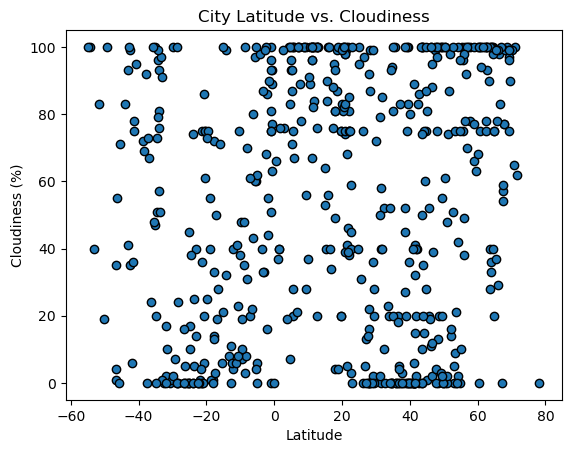

In [16]:
# Build the scatter plots for latitude vs. cloudiness
x_vals = city_data_df['Lat']
y_vals = city_data_df['Cloudiness']
plt.scatter(x_vals,y_vals,edgecolors="black")
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

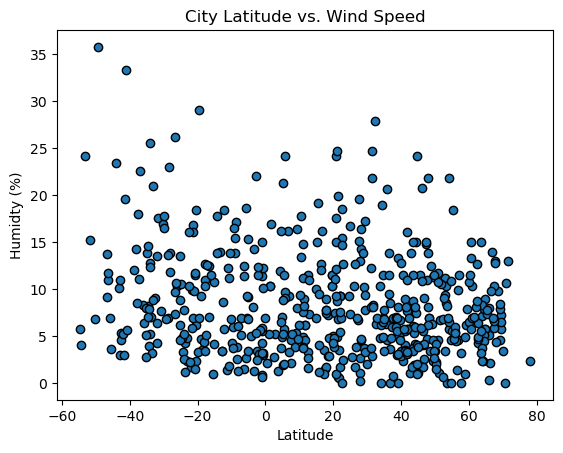

In [17]:
# Build the scatter plots for latitude vs. wind speed
x_vals = city_data_df['Lat']
y_vals = city_data_df['Wind Speed']
plt.scatter(x_vals,y_vals,edgecolors="black")
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidty (%)')
plt.title('City Latitude vs. Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# Define a function to create Linear Regression plots


def regression(x, y, x_label='', y_label='', title='', show_grid=False):
    # Ensure x_data is a numpy array
    x= np.array(x)
    
    # Linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regress_values = x * slope + intercept
    line = f"y = {slope:.2f}x + {intercept:.2f}"

    # Scatter plot
    plt.scatter(x, y, marker='o', facecolors='blue', edgecolors='black', label='Data points')

    # Regression line
    plt.plot(x, regress_values, "r-", label=line)
                  
    # Title, labels, and aesthetics
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(show_grid)
    plt.legend(loc='best')
    plt.show()

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,37.87,90,100,9.78,GL,1724890740
1,agdas,40.6500,47.4761,73.87,46,0,2.33,AZ,1724890783
2,kapa'a,22.0752,-159.3190,82.72,70,75,9.22,US,1724890739
4,iskateley,67.6803,53.1512,45.36,91,77,12.95,RU,1724890784
6,olonkinbyen,70.9221,-8.7187,43.65,97,100,10.69,SJ,1724890603


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,kingscliff,-28.2667,153.5667,81.95,69,0,13.80,AU,1724890783
5,blackmans bay,-43.0167,147.3167,50.74,69,93,3.00,AU,1724890723
7,tual,-5.6667,132.7500,78.04,84,97,18.66,ID,1724890784
10,waitangi,-43.9535,-176.5597,52.79,92,83,23.42,NZ,1724890722
11,port-aux-francais,-49.3500,70.2167,42.24,97,100,35.79,TF,1724890720


###  Temperature vs. Latitude Linear Regression Plot

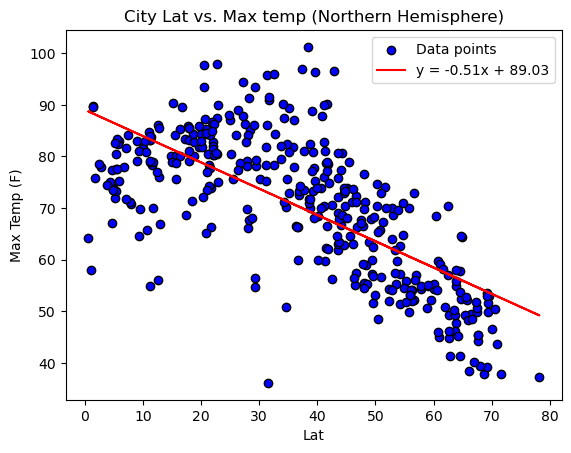

In [40]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']

regression(x,y, x_label = 'Lat', y_label = 'Max Temp (F)', title = 'City Lat vs. Max temp (Northern Hemisphere)')

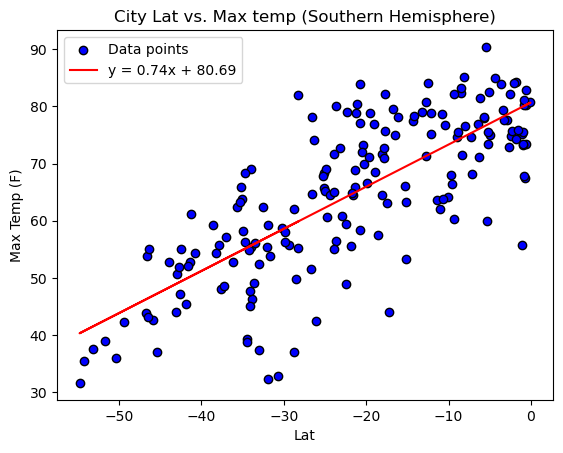

In [39]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']

regression(x,y, x_label = 'Lat', y_label = 'Max Temp (F)', title = 'City Lat vs. Max temp (Southern Hemisphere)')

**Discussion about the linear relationship:**We observe a negative correlation (r = -0.51) between city latitude and maximum temperature in the Northern Hemisphere. This negative correlation indicates that as you move further from the equator (toward higher latitudes), the maximum temperatures tend to decrease, which makes sense because higher latitudes are typically farther from the equator and thus cooler.

Similarly, in the Southern Hemisphere, we see a positive correlation (r = 0.74) between latitude and maximum temperature. In this case, as the latitude decreases (moving closer to the equator), temperatures increase, which aligns with the expectation that areas closer to the equator generally experience higher temperatures.

### Humidity vs. Latitude Linear Regression Plot

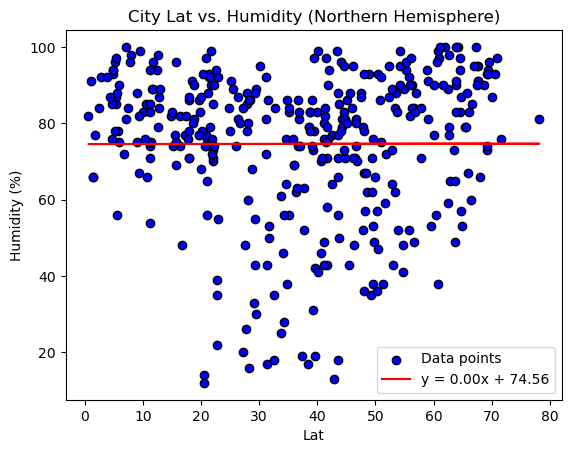

In [41]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']

regression(x,y, x_label = 'Lat', y_label = 'Humidity (%)', title = 'City Lat vs. Humidity (Northern Hemisphere)')

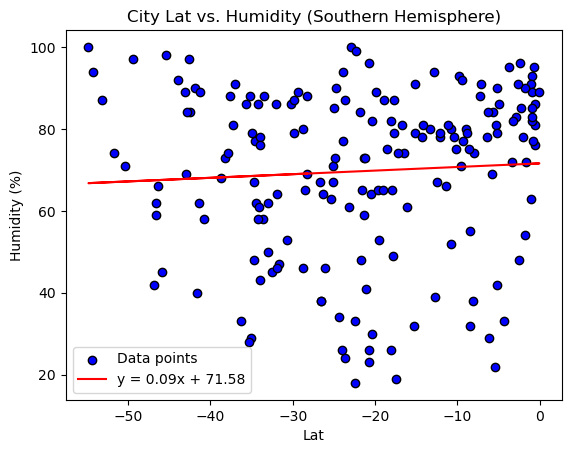

In [42]:
# Southern Hemisphere
# Northern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']

regression(x,y, x_label = 'Lat', y_label = 'Humidity (%)', title = 'City Lat vs. Humidity (Southern Hemisphere)')

**Discussion about the linear relationship:** There doesn't appear to be any significant correlation between the latitude of a city and its humidity levels. This suggests that latitude alone may not be a strong determinant of humidity, and other factors like proximity to bodies of water, elevation, and local climate conditions likely play a more significant role in influencing a city's humidity.

### Cloudiness vs. Latitude Linear Regression Plot

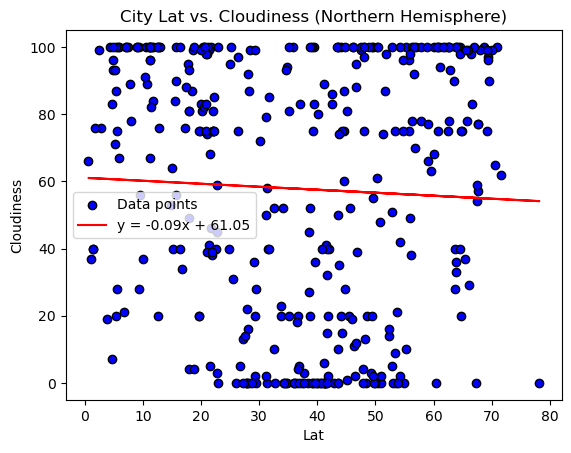

In [43]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']

regression(x,y, x_label = 'Lat', y_label = 'Cloudiness', title = 'City Lat vs. Cloudiness (Northern Hemisphere)')

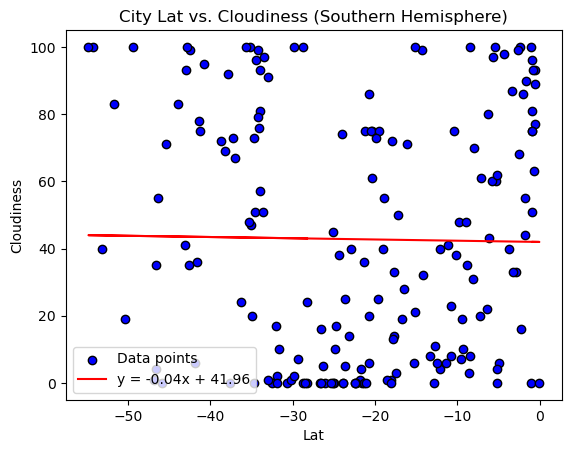

In [44]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']

regression(x,y, x_label = 'Lat', y_label = 'Cloudiness', title = 'City Lat vs. Cloudiness (Southern Hemisphere)')

Similarly, we observe that city latitude does not have a significant effect on cloudiness, just as we saw with humidity. 

### Wind Speed vs. Latitude Linear Regression Plot

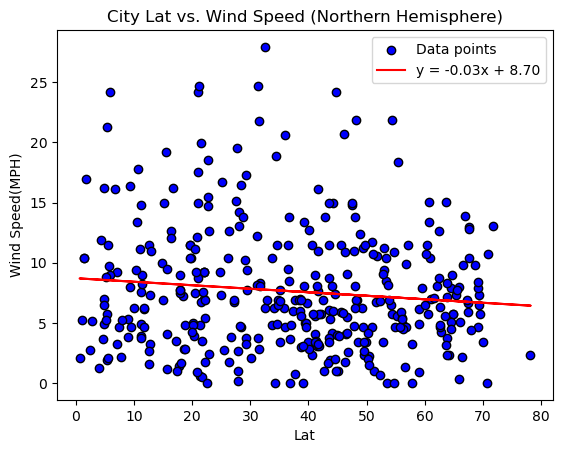

In [45]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']

regression(x,y, x_label = 'Lat', y_label = 'Wind Speed(MPH)', title = 'City Lat vs. Wind Speed (Northern Hemisphere)')

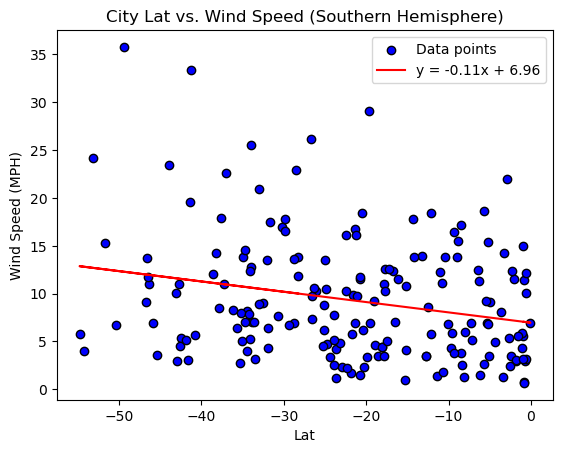

In [46]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']

regression(x,y, x_label = 'Lat', y_label = 'Wind Speed (MPH)', title = 'City Lat vs. Wind Speed (Southern Hemisphere)')

**Discussion about the linear relationship:** Although the correlation isn't strong, both graphs show negative slopes, indicating that wind speeds may decrease as you move closer to the equator. This suggests a potential trend where areas closer to the equator experience lower wind speeds, even if the overall correlation is not particularly pronounced.